In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

In [16]:
data0 = pd.read_csv('arrhythmia_data2.csv', header=None, low_memory=False)
data = data0[1:3568]
datat = data0.transpose()
labels = datat[0]
print(range(len(data)))

range(0, 3567)


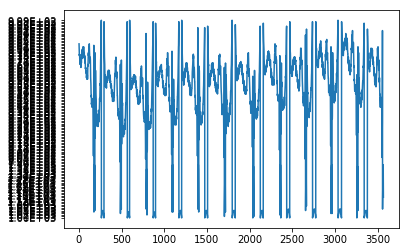

'N'

In [3]:
sample = 3
plt.plot(data[sample])
plt.show()
labels[sample]

In [21]:
class ecg2class(nn.Module):
    def __init__(self):
        super(ecg2class, self).__init__()
        self.conv1 = nn.Conv1d(1, 6, 5, 1, 0, 1)
        self.conv2 = nn.Conv1d(6, 16, 5, 1, 0, 1)
        self.fc1 = nn.Linear(888 * 16, 888*4)
        self.fc2 = nn.Linear(888 * 4, 100)
        self.fc3 = nn.Linear(100,3)
        
    
    def train(self):
        mbatch = 1;
        mepoch = 10;
        output_nodes = 10;
        
        trainsumerrora = [];
        testsumerrora = [];
        epocha = []
        tanh = nn.Tanh()
        starttime = time.time()
        optimizer = optim.SGD(self.parameters(), lr = 0.01)
        perm = np.random.permutation(len(datat))
        
        for epoch in range(0, mepoch):
            epocha.append(epoch)  
            trainsumerror = 0
            for z in range(len(datat)):
                i = perm[z]
                optimizer.zero_grad()
                input_dat = torch.FloatTensor(data[i].values.astype(float)).unsqueeze(0).unsqueeze(0)
                if labels[i] == 'N':
                    target = [1, 0, 0]
                elif labels[i] == 'AF':
                    target = [0, 1, 0]
                elif labels[i] == 'O':
                    target = [0, 0, 1]
                
                
                targetV = Variable(torch.FloatTensor(target))
                
                out = tanh(self.conv1(Variable(input_dat)))
                out = F.max_pool1d(out, 2)
                out = tanh(self.conv2(out))
                out = F.max_pool1d(out, 2)
                out = out.view(-1, 888 * 16)
                out = tanh(self.fc1(out))
                out = tanh(self.fc2(out))
                out = tanh(self.fc3(out))
                
                out_loss = nn.MSELoss()
                loss = out_loss(out, targetV)
                loss.backward()
                optimizer.step()
            
                trainsumerror = trainsumerror + loss[0].detach().numpy()[0]
            
            print(trainsumerror/77)
            trainsumerrora.append(trainsumerror/77)
            
            testsumerror = 0
            
        endtime = time.time()
        averageTime = (endtime - starttime)/mepoch
        print(averageTime)
        
        fig, ax = plt.subplots()
        ax.plot(epocha, trainsumerrora, 'r', label = 'Training Error')
        legend = ax.legend()
        plt.show()
        

0.343817450859
0.220438631953
0.202554765266
0.20072009608
0.19968118896
0.198736806195
0.197870027709
0.197086009886
0.19636900423
0.195712892653
27.240590071678163


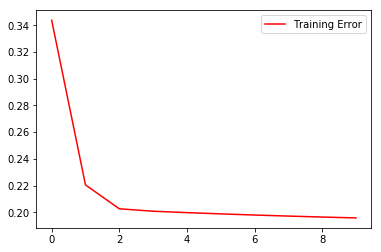

In [22]:
ecgModel = ecg2class()
ecgModel.train() 